#Лабораторная работа №3

Создание нейронной сети, выполняющей предсказание непрерывной величины

In [ ]:
%%capture
!wget https://www.dropbox.com/s/bbm6rxqb4bsfl2d/training_data.xlsx
!wget https://www.dropbox.com/s/gjhur7eyzcv265y/test_data.xlsx

In [ ]:
import pandas as pd
train_data = pd.read_excel('training_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
test_data = pd.read_excel('test_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
train_data

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4908,21480,2013,3,8,64412,rebuilt,automatic,4wd,full-size,44.409987,-89.880544,45.0
4909,1,2014,3,6,117123,clean,automatic,rwd,full-size,29.975385,-90.172386,67.0
4910,16500,2010,3,8,91275,clean,automatic,4wd,full-size,42.398900,-123.353800,50.0
4911,16000,2012,3,8,132000,clean,automatic,4wd,NaN,47.668248,-117.415416,50.0


Ниже в таблице представлено описание каждого из 12 полей.

|Название поля 	 |Описание      	                              |Название поля   |Описание                                  |
|:--------------:|:----------------------------------------------:|:--------------:|:----------------------------------------:|
|**price**       |Цена                                            |**transmission**|Коробка передач                           |
|**year**        |Год производства 	                              |**drive**       |Привод                                    |
|**condition**   |Состояние        	                              |**size**        |Полноразмер или нет                       |
|**cylinders**   |Количество цлиндров 	                          |**lat**         |Широта 	                                  |
|**odometer**    |Пробег                                          |**long**        |Долгота  	                              |
|**title_status**|Легальный статус авто  (все документы в наличии)|**weather**     |Среднегодовая температура в городе продажи|


Проверим данные на наличие пропусков и типов переменных

Начнем с проверки общей информации о данных.
Для того чтобы это сделать, нужно вызвать у переменной *train_data* метод **info()**.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4913 non-null   int64  
 1   year          4913 non-null   int64  
 2   condition     4913 non-null   int64  
 3   cylinders     4913 non-null   int64  
 4   odometer      4913 non-null   int64  
 5   title_status  4913 non-null   object 
 6   transmission  4913 non-null   object 
 7   drive         4651 non-null   object 
 8   size          3825 non-null   object 
 9   lat           4913 non-null   float64
 10  long          4913 non-null   float64
 11  weather       4801 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 460.7+ KB


Анализируем результата выполнения команды:

* 4913 строк (entries)
* 12 столбцов (Data columns)

В данных присутствует три типа dtypes:
* int64 - целое число  (5 столбцов)
* float64 - дробное число (3 столбца)
* object - не число, обычно текст (4 столбца)

В нашем случае признаки с типом object имеют текстовые значения.

Цифры в каждой строчке обозначают количество заполненных (*non-null*) значений. Видно, что в данных содержатся пропуски, так как эти цифры не в каждой строчке совпадают с полным числом строк (4913).

Для удобства работы выкинем NaN данные из нашего датасета, применив метод **dropna()** к *train_data*:

In [ ]:
train_data.dropna()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4906,14850,2014,4,6,39000,salvage,automatic,rwd,full-size,32.608400,-117.056500,59.0
4907,5979,1999,2,8,178825,clean,automatic,4wd,full-size,42.550206,-114.462303,47.0
4908,21480,2013,3,8,64412,rebuilt,automatic,4wd,full-size,44.409987,-89.880544,45.0
4909,1,2014,3,6,117123,clean,automatic,rwd,full-size,29.975385,-90.172386,67.0


С помощью метода **_get_numeric_data()** оставим столбцы, содержащие только числовые данные.

In [ ]:
train_data = train_data._get_numeric_data()

In [ ]:
train_data.head()

,price,year,condition,cylinders,odometer,lat,long,weather
0,43900,2016,4,6,43500,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,45.518031,-122.578752,50.0


In [ ]:
target_name = 'price'
y_train = train_data[target_name]
X_train = train_data.drop(target_name, axis=1)

Таким образом мы разделили целевую переменную и входные признаки в различные **dataframe**. Аналогичным образом необходимо провести обработку тестовых данных.

В качестве примера создания использовать [пример с лекции](https://colab.research.google.com/drive/1FTaM9W8J88lfygvEDAM1Lk7_9iUhfA2f?usp=sharing).

**Задание 1:**
Создать нейронную сеть, которая будет предсказывать цену автомобиля на основе числовых полей исходного датасета (оценку качества регрессора проводить на основе метрик MAE, MSE).

In [ ]:
test_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,5990,2004,4,8,210445,clean,automatic,4wd,full-size,38.731803,-90.073678,48.0
1,18995,2015,2,6,142282,clean,automatic,4wd,full-size,42.504823,-92.405569,47.0
2,23500,2012,3,6,100710,clean,automatic,4wd,full-size,36.060541,-95.795447,57.0
3,24988,2012,4,6,85572,clean,automatic,4wd,NaN,30.457703,-84.347448,65.0
4,20995,2014,3,6,157556,clean,automatic,NaN,full-size,42.701772,-89.008858,45.0


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2104 non-null   int64  
 1   year          2104 non-null   int64  
 2   condition     2104 non-null   int64  
 3   cylinders     2104 non-null   int64  
 4   odometer      2104 non-null   int64  
 5   title_status  2104 non-null   object 
 6   transmission  2104 non-null   object 
 7   drive         1975 non-null   object 
 8   size          1628 non-null   object 
 9   lat           2104 non-null   float64
 10  long          2104 non-null   float64
 11  weather       2036 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 197.4+ KB


In [ ]:
test_data.dropna()
test_data = test_data._get_numeric_data()
y_test = test_data[target_name]
X_test = test_data.drop(target_name, axis=1)

Epoch 1/5
366/366 [==============================] - 10s 12ms/step - loss: 267931568.0000 - mean_squared_error: 267931536.0000 - mean_absolute_error: 12071.1143 - val_loss: 264027072.0000 - val_mean_squared_error: 264027072.0000 - val_mean_absolute_error: 11887.3184
Epoch 2/5
366/366 [==============================] - 4s 11ms/step - loss: 263388320.0000 - mean_squared_error: 263388320.0000 - mean_absolute_error: 11954.7773 - val_loss: 260665664.0000 - val_mean_squared_error: 260665664.0000 - val_mean_absolute_error: 11804.1318
Epoch 3/5
366/366 [==============================] - 5s 13ms/step - loss: 260530592.0000 - mean_squared_error: 260530592.0000 - mean_absolute_error: 11892.5732 - val_loss: 249507232.0000 - val_mean_squared_error: 249507232.0000 - val_mean_absolute_error: 11650.4502
Epoch 4/5
366/366 [==============================] - 2s 6ms/step - loss: 134948064.0000 - mean_squared_error: 134948048.0000 - mean_absolute_error: 8576.8789 - val_loss: 69324384.0000 - val_mean_square

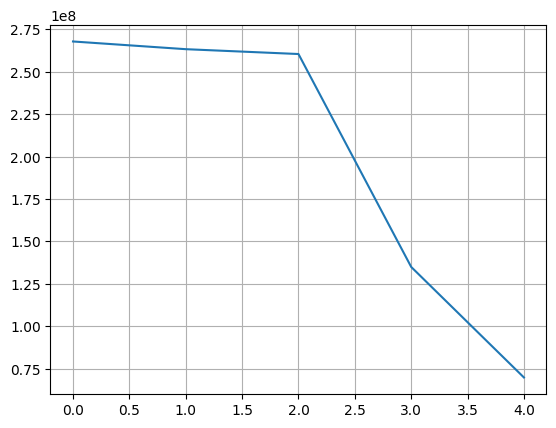

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

nn_numeric = models.Sequential()
nn_numeric.add(Dense(units=7, activation='selu'))
nn_numeric.add(Dense(units=20, activation='selu'))
nn_numeric.add(Dense(units=20, activation='selu'))
nn_numeric.add(Dense(units=1, activation='linear'))

nn_numeric.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics = ["mean_squared_error", "mean_absolute_error"])

history = nn_numeric.fit(X_train, y_train, epochs=5, verbose=True, batch_size=10, validation_data=(X_test, y_test))

print("Test-MSE:", history.history["mean_squared_error"])
print("Test-MAE:", history.history["mean_absolute_error"])

plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

In [ ]:
pred = nn_numeric.predict(X_test)
pred = pd.DataFrame(pred, columns=['pred'])
pred.assign(y_test=y_test)

49/49 [==============================] - 0s 2ms/step


,pred,y_test
0,5798.138184,5990.0
1,9812.240234,18995.0
2,16013.195312,23500.0
3,14523.742188,NaN
4,20863.005859,NaN
...,...,...
1538,26360.656250,3900.0
1539,26663.535156,8900.0
1540,27737.867188,NaN
1541,7995.801758,21900.0


**Задание 2:**
Создать нейронную сеть, которая будет предсказывать цену автомобиля на основе всех полей исходного датасета (оценку качества регрессора проводить на основе метрик MAE, MSE). Для кодирования текстовых полей можно воспользоваться **LabelEncoder** либо **OneHotEncoder** из библиотеки **sklearn.preprocessing**.

In [ ]:
train_data = pd.read_excel('training_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
test_data = pd.read_excel('test_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4913 non-null   int64  
 1   year          4913 non-null   int64  
 2   condition     4913 non-null   int64  
 3   cylinders     4913 non-null   int64  
 4   odometer      4913 non-null   int64  
 5   title_status  4913 non-null   object 
 6   transmission  4913 non-null   object 
 7   drive         4651 non-null   object 
 8   size          3825 non-null   object 
 9   lat           4913 non-null   float64
 10  long          4913 non-null   float64
 11  weather       4801 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 460.7+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# Удаляем строки с пропусками
df = train_data.dropna().reset_index().drop('index', axis=1)

# Числовые фичи без целевой переменной
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols.remove('price')

# Категориальные фичи
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Целевая переменная
target_col = 'price'

# Нормализуем числовые признаки
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Применим OneHotEncoder для категориальных фичей
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder.fit(df[cat_cols])
new_cat_cols = encoder.get_feature_names_out(cat_cols).tolist()
one_hot_encoded = encoder.transform(df[cat_cols])

# Все фичи
feature_cols = num_cols + new_cat_cols

one_hot_df = pd.DataFrame(one_hot_encoded, columns=new_cat_cols)
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(cat_cols, axis=1)

# Обучающая выборка
X_train = df_encoded[feature_cols]
y_train = df_encoded[target_col]

In [ ]:
X_train

,year,condition,cylinders,odometer,lat,long,weather,title_status_lien,title_status_missing,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd,size_full-size,size_mid-size,size_sub-compact
0,1.167883,2.116606,-1.486357,-0.895149,-0.524881,0.608485,0.885530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.121865,-0.871304,0.647256,-0.233808,0.223783,1.245397,-0.019577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.924154,-0.871304,0.647256,1.021204,0.599922,0.572285,-0.924684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.223017,-2.365258,0.647256,0.639902,0.279137,0.618883,-0.407480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.774723,0.622651,0.647256,0.607907,1.169456,-2.505173,-0.278179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3654,0.869021,2.116606,-1.486357,-0.949625,-1.248407,-2.076335,0.885530,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3655,-1.372448,-0.871304,0.647256,0.743042,0.613608,-1.874879,-0.666082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3656,0.719590,0.622651,0.647256,-0.641997,0.961929,0.034050,-0.924684,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3657,0.869021,0.622651,-1.486357,-0.003898,-1.741548,0.011387,1.919938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
# Подготовим данные для тестовой выборки
# Удаляем строки с пропусками
df = test_data.dropna().reset_index().drop('index', axis=1)

# Нормализуем числовые признаки
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Применим OneHotEncoder для категориальных фичей
one_hot_encoded = encoder.transform(df[cat_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=new_cat_cols)
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(cat_cols, axis=1)

# Тестовая выборка
X_test = df_encoded[feature_cols]
y_test = df_encoded[target_col]

In [ ]:
X_test

,year,condition,cylinders,odometer,lat,long,weather,title_status_lien,title_status_missing,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd,size_full-size,size_mid-size,size_sub-compact
0,-0.637498,2.047377,0.691635,1.054418,-0.110140,0.025667,-0.537820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.019509,-0.827148,-1.396805,0.284931,0.593823,-0.153729,-0.667525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.567598,0.610115,-1.396805,-0.184373,-0.608540,-0.414519,0.629530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.718235,0.610115,-1.396805,-0.096432,0.613895,0.567204,-0.926936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.240047,0.610115,0.691635,-0.535571,-1.210860,-0.520190,1.926584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,1.320784,0.610115,-1.396805,-1.061941,-0.947458,0.965218,0.499824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1539,1.019509,0.610115,-1.396805,-1.055991,-1.239145,-2.058888,0.888941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1540,-0.486861,-0.827148,0.691635,-1.321281,-0.206881,0.355544,-0.278409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1541,0.416961,-0.827148,0.691635,0.530104,0.712446,-0.229079,-0.667525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Epoch 1/50
37/37 [==============================] - 1s 10ms/step - loss: 350540928.0000 - mean_squared_error: 350540928.0000 - mean_absolute_error: 15311.6816 - val_loss: 331766656.0000 - val_mean_squared_error: 331766656.0000 - val_mean_absolute_error: 14824.9697
Epoch 2/50
37/37 [==============================] - 0s 5ms/step - loss: 227437680.0000 - mean_squared_error: 227437680.0000 - mean_absolute_error: 11700.0000 - val_loss: 63635440.0000 - val_mean_squared_error: 63635440.0000 - val_mean_absolute_error: 5606.5054
Epoch 3/50
37/37 [==============================] - 0s 5ms/step - loss: 50230992.0000 - mean_squared_error: 50230992.0000 - mean_absolute_error: 5049.2886 - val_loss: 39280052.0000 - val_mean_squared_error: 39280052.0000 - val_mean_absolute_error: 4233.6621
Epoch 4/50
37/37 [==============================] - 0s 5ms/step - loss: 35899660.0000 - mean_squared_error: 35899660.0000 - mean_absolute_error: 4100.0469 - val_loss: 30845822.0000 - val_mean_squared_error: 30845822.

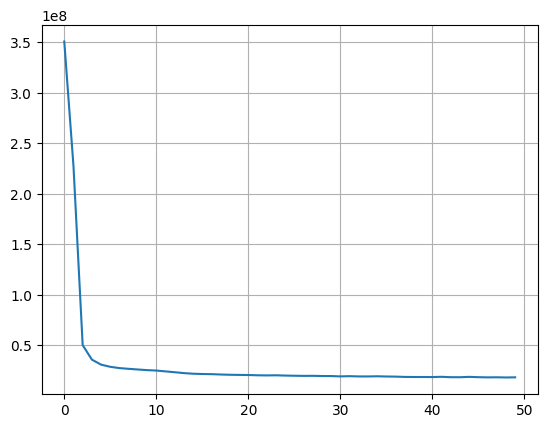

In [ ]:
from tensorflow.keras import models, optimizers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Создадим полносвязную сеть
nn = models.Sequential()

# Добавим вхоной слой
nn.add(Dense(units=18, activation='selu'))
# Добавим два скрытых слоя с активацией relu
nn.add(Dense(units=30, activation='relu'))
nn.add(Dense(units=15, activation='relu'))

# Добавим выходной слой с одним нейроном и линейной активацией
nn.add(Dense(units=1, activation='linear'))

# Созадим оптимизатор Adam и укажем шаг обучения
adam = optimizers.Adam(learning_rate=0.01)

# Компилируем поличившуюся нейросеть, в качестве функции потерь будем использовать MSE
nn.compile(
    loss='mean_squared_error',
    optimizer=adam,
    metrics = ["mean_squared_error", "mean_absolute_error"])

# Запускаем обучение
history = nn.fit(X_train, y_train, epochs=50, verbose=True, batch_size=100, validation_data=(X_test, y_test))
print("Train-MSE:", history.history["mean_squared_error"])
print("Train-MAE:", history.history["mean_absolute_error"])

results = nn.evaluate(X_test, y_test)
print("Test-MSE:", results[1])
print("Test-MAE:", results[2])

plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

Из графика видно что мы нашили локальный минимум функции потерь и дальнейшее обучение на текущих параметрах, с данной выборкой бессмысленно. Метрики на обучающих и тестовых данных отличаются не сильно, занчит нейросеть не переобучилась, что радует)

Теперь сравним предсказанные и ожидаемые цены автомобилей

In [ ]:
pred = nn.predict(X_test)
pred = pd.DataFrame(pred, columns=['pred'])
pred = pred.assign(y_test=y_test)
pred

49/49 [==============================] - 0s 1ms/step


,pred,y_test
0,7098.737305,5990
1,21580.910156,18995
2,21828.613281,23500
3,21398.056641,20495
4,7123.460938,6000
...,...,...
1538,38229.734375,62995
1539,27199.146484,22500
1540,11973.509766,5975
1541,11735.034180,10900


Видим что для недорогих автомобилий цена предсказана достачно точно, но вот для автомобили за 60к ошибка составляет более 30%.